In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
traffic = pd.read_csv('traffic.csv')

In this exciting project, we're going to find out what are the main indicators of traffic on the I95. let's go!


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918


In [5]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,9/30/2018 19:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 20:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,9/30/2018 21:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 22:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 23:00,954


(array([ 287., 5333., 2469., 2701., 1377., 1024.,  878.,  944., 1017.,
        1054., 1601., 2098., 1940., 1468., 1362., 1108., 1298., 1936.,
        2663., 2701., 2524., 2090., 1739., 1807., 1676., 1250.,  931.,
         650.,  233.,   45.]),
 array([   0.        ,  242.66666667,  485.33333333,  728.        ,
         970.66666667, 1213.33333333, 1456.        , 1698.66666667,
        1941.33333333, 2184.        , 2426.66666667, 2669.33333333,
        2912.        , 3154.66666667, 3397.33333333, 3640.        ,
        3882.66666667, 4125.33333333, 4368.        , 4610.66666667,
        4853.33333333, 5096.        , 5338.66666667, 5581.33333333,
        5824.        , 6066.66666667, 6309.33333333, 6552.        ,
        6794.66666667, 7037.33333333, 7280.        ]),
 <BarContainer object of 30 artists>)

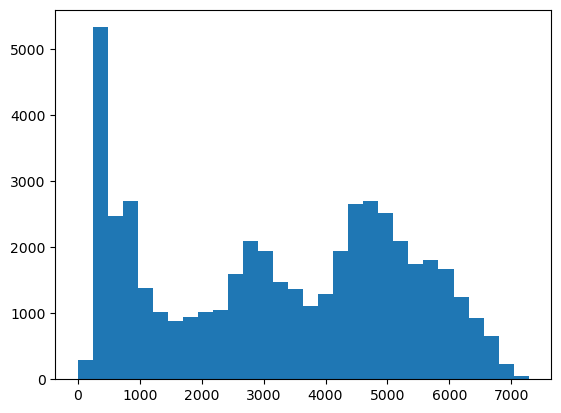

In [6]:
plt.hist(traffic['traffic_volume'], bins=30)


In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram it seems that there is one significant bump at around 5000 cars on the road that happens the most often. there are other peaks of around 3k and 5k values. There is a significant standard deviation of close to 2k. It's rare that the traffic volume reaches above 6k. 

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
traffic['hour'] = traffic['date_time'].dt.hour


In [10]:
day = traffic.copy()[(traffic['hour'] >= 7) & (traffic['hour']< 20)]
night = traffic.copy()[(traffic['hour'] < 7) | (traffic['hour'] > 19)]
print (day.shape)
print (night.shape)

(25838, 10)
(22366, 10)


(0.0, 8000.0)

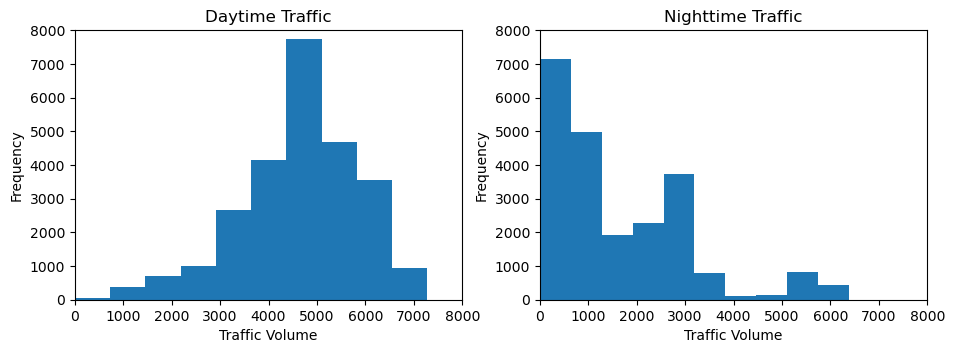

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (11, 3.5))
axes[0].hist(day['traffic_volume'])
axes[0].set_title('Daytime Traffic')

axes[0].set_xlabel('Traffic Volume')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 8000)
axes[0].set_ylim(0, 8000)

axes[1].hist(night['traffic_volume'])
axes[1].set_title('Nighttime Traffic')
axes[1].set_xlabel('Traffic Volume')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 8000)
axes[1].set_ylim(0, 8000)



(0.0, 8000.0)

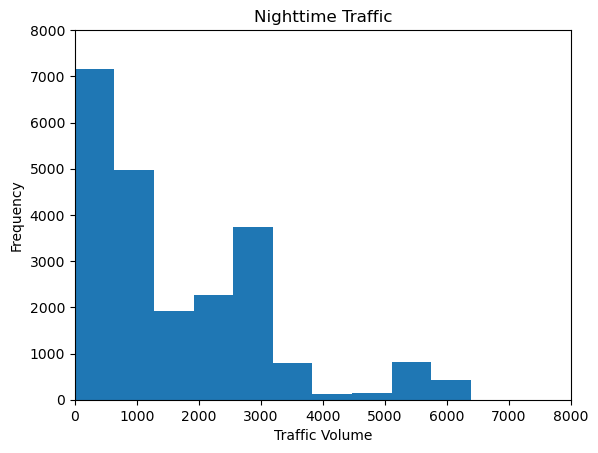

In [12]:
plt.hist(night['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)


In [13]:
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

In [16]:
day['month'] = day['date_time'].dt.month


In [20]:
by_month = day.groupby('month')['traffic_volume'].mean()


In [21]:
print (by_month)

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64


Text(0, 0.5, 'Traffic Volume')

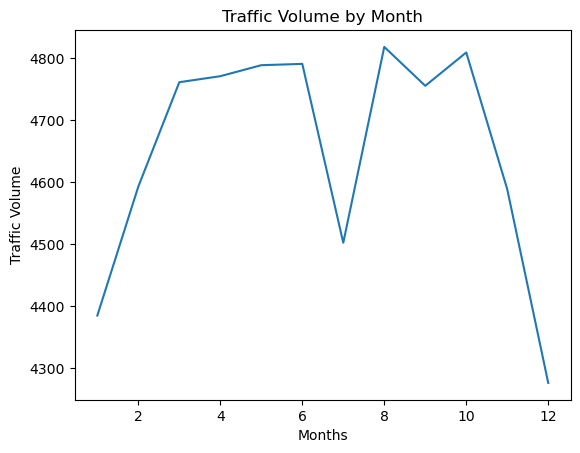

In [24]:
plt.plot(by_month)
plt.title('Traffic Volume by Month')
plt.xlabel('Months')
plt.ylabel('Traffic Volume')

Text(0, 0.5, 'Traffic Volume')

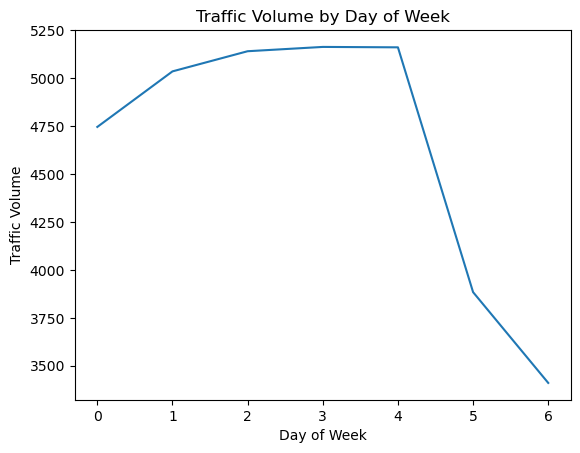

In [26]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek')['traffic_volume'].mean()
plt.plot(by_dayofweek)
plt.title('Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')



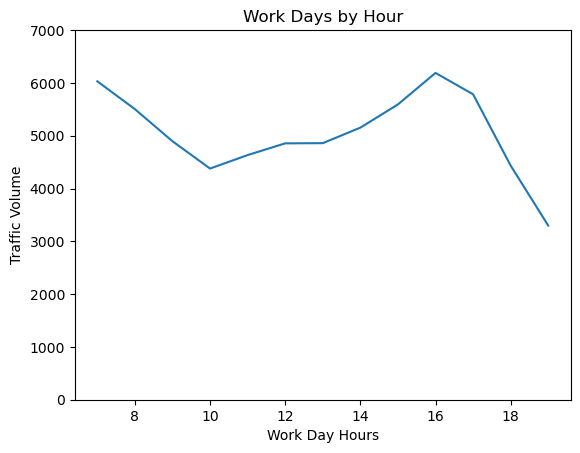

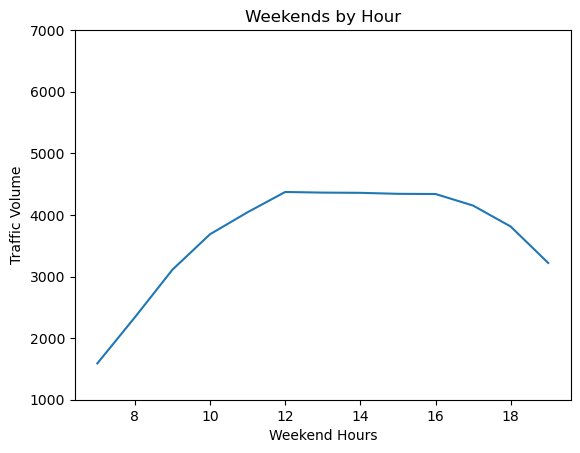

In [29]:
day['hour'] = day['date_time'].dt.hour
work_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_work = work_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()
plt.plot(by_hour_work)
plt.title('Work Days by Hour')
plt.xlabel('Work Day Hours')
plt.ylabel('Traffic Volume')
plt.ylim(0, 7000)
plt.show()
plt.plot(by_hour_weekend)
plt.title('Weekends by Hour')
plt.xlabel('Weekend Hours')
plt.ylabel('Traffic Volume')
plt.ylim(1000, 7000)
plt.show()

It seems that on work days, traffic peaks around 7 morning and 4 afternoon. Whereas on weekend, traffic peaks at 12 and stays the same until 4 afternoon. Overall, traffic is significantly lower on weekends - where peak reaches between 4k and 5k - than on work days, when peak reaches over 6k.


In [32]:
traffic['traffic_volume'].corr(traffic['temp'])

0.13029879817112652

In [34]:
traffic['traffic_volume'].corr(traffic['rain_1h'])

0.004713702367859224

In [35]:
traffic['traffic_volume'].corr(traffic['snow_1h'])

0.0007334345358283855

In [36]:
traffic['traffic_volume'].corr(traffic['clouds_all'])

0.06705377704283509

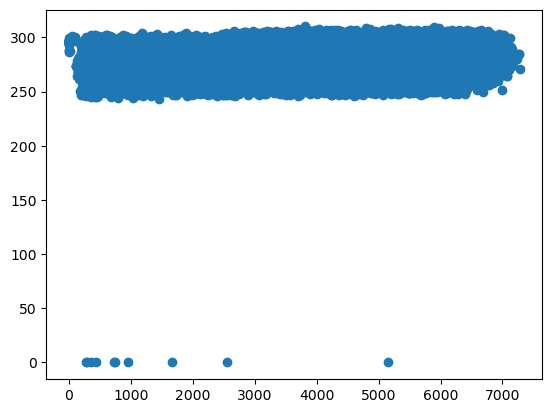

In [38]:
plt.scatter(traffic['traffic_volume'], traffic['temp'])

In [41]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean()

In [42]:
print (by_weather_main.head(5))

weather_main
Clear      4661.666879
Clouds     4746.375927
Drizzle    4712.699060
Fog        4298.933511
Haze       4545.434932
Name: traffic_volume, dtype: float64


<Axes: ylabel='weather_main'>

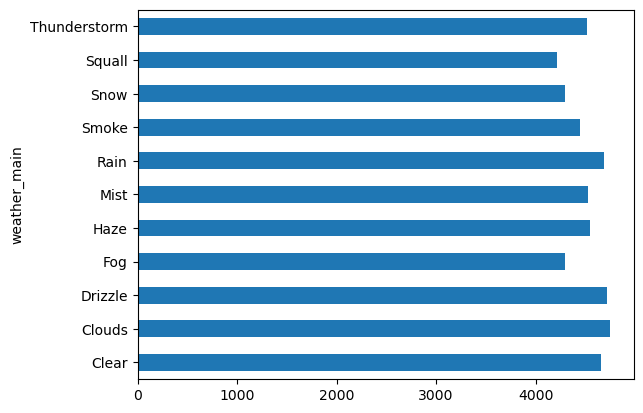

In [45]:
by_weather_main.plot.barh()

<Axes: ylabel='weather_description'>

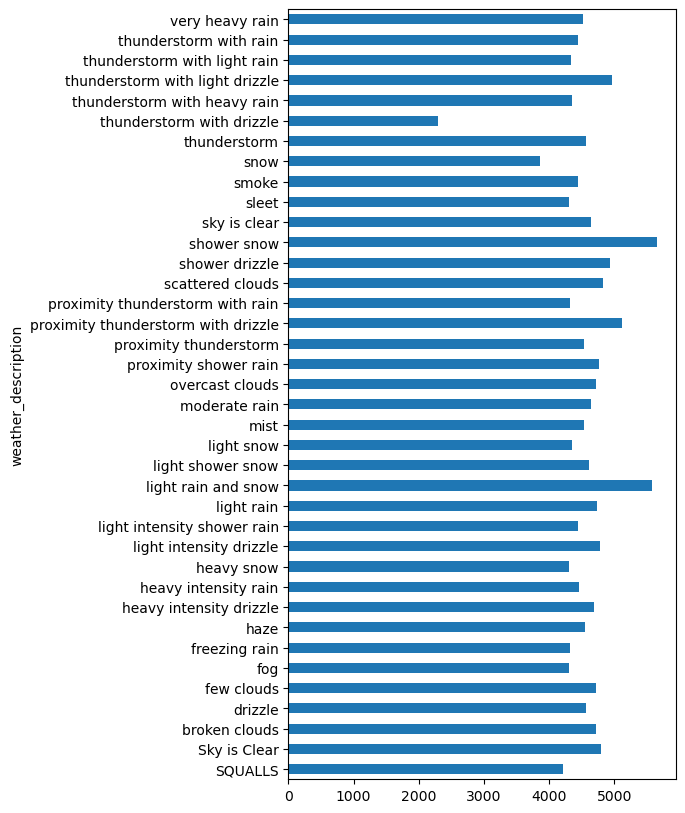

In [49]:
by_weather_description.plot.barh(figsize=(5, 10))

From analyzing the weather patterns it seems that the only indicators for heavier than usual traffic are light rain and snow and shower snow. It could be that such type of weathers create sleet that slow down cars and cause heavier traffic than usual. 